# Generating Training Data

In [24]:
import matplotlib
from matplotlib import pyplot as plt
import math
import random

import numpy as np
from scipy import stats

In [2]:
functions = [lambda x : x, 
             lambda x : 101 - x,
             lambda x : 50.5 + 49.5 * math.sin(math.pi / 2 + x / (5 * math.pi)),
             lambda x : random.randint(1, 101)]

In [3]:
points = []
xs = []
ys = []
for i in range(50):
    x = random.randint(1,101)
    y = functions[2](x)
#     print(x, y)
    points.append((x,y))
    xs.append(x)
    ys.append(y)

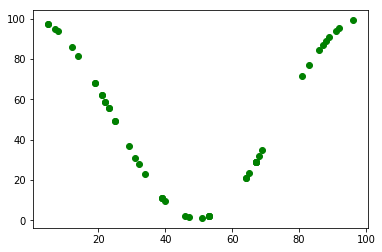

In [4]:
plt.figure()
plt.scatter(xs, ys, color="green")

In [5]:
def plot_function(func_num, plot=True):
    """
    Plot 50 (x,y) pairs for given function
    """
    points = []
    xs = []
    ys = []
    colors = ['maroon', 'blue', 'green', 'orange']
    for i in range(50):
        x = random.randint(1,101)
        y = functions[func_num](x)
    #     print(x, y)
        points.append((x,y))
        xs.append(x)
        ys.append(y)
    if plot:
        plt.figure()
        plt.scatter(xs, ys, color=colors[func_num])
    return (xs, ys)

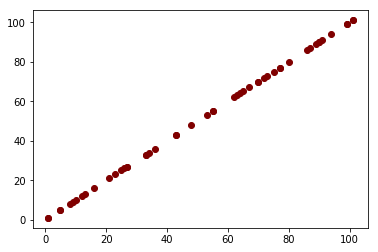

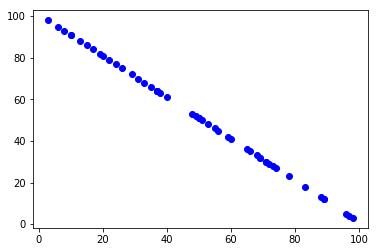

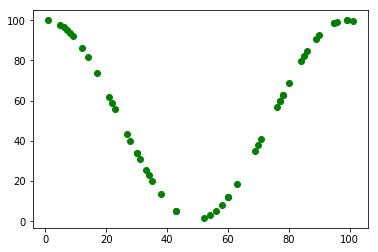

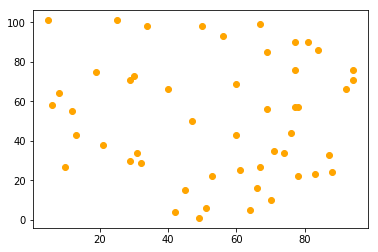

In [6]:
for i in range(4):
    plot_function(i)

In [7]:
def graph_normal(mu, sigma):
    # uncomment this code to graph the normal distribution 
    a = np.random.normal(mu, sigma, 1000)
    count, bins, ignored = plt.hist(a, 30, density=True)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
             np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
             linewidth=2, color='r')
    plt.show()

In [8]:
# mu, sigma = 0, 1 # mean and standard deviation
a = np.random.normal(1, 1, 1000)
b = np.random.normal(0, 1, 1000)

In [9]:
asum= 0
for i in range(25):
    asum += a[random.randint(0,len(a)-1)]
print(asum/25)

1.004894999350096


# Model for Generations

In [272]:
def get_prob_data_given_func(points_known, a, b, y_sigma=20):
#     prod = 1
    prod = 0
    for x, y in points_known:
        y_pred = a*x+b
        norm = np.log(stats.norm.pdf(y_pred, y, y_sigma))
#         prod = prod * norm
        prod = prod + norm
    return prod

def get_probs_for_discrete_funcs_given_data(points_known, mu_a=1.0, mu_b=0.0, sigma_a=1.0, sigma_b=1.0, out=False):
    probs = np.zeros((500,200))
#     probs = np.zeros((5,2))
    for a in np.arange(-2.0, 3.0, 0.01):
        for b in np.arange(-1.0, 1.0, 0.01):
            prob_a = stats.norm.pdf(a, mu_a, sigma_a)
            prob_b = stats.norm.pdf(b, mu_b, sigma_b)
            prob_data_given_func = get_prob_data_given_func(points_known, a, b)
            if out:
                print("values of a, b", a, b)
                print("multiplication", prob_data_given_func + np.log(prob_a) + np.log(prob_b))
            probs[int(100*a+200)][int(100*b+100)] = np.exp(prob_data_given_func + np.log(prob_a) + np.log(prob_b))
            
    return probs

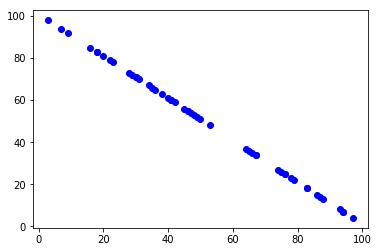

In [275]:
xs_1, ys_1 = plot_function(1, plot=True)
xs = list(np.copy(xs_1))
ys = list(np.copy(ys_1))

In [276]:
train_set = []
for i in range(25):
    ind = random.randint(0, len(xs)-1)
    x = xs.pop(ind)
    y = ys.pop(ind)
    
    train_set.append((x,y))

In [277]:
mu_a, sigma_a = 1.0, 20.0
mu_b, sigma_b = 0.0, 20.0
probs = get_probs_for_discrete_funcs_given_data(train_set, mu_a, mu_b, sigma_a, sigma_b,)

In [278]:
# ii = np.unravel_index(np.argsort(probs.ravel())[-10:], probs.shape)
# opts = []
# for i in range(len(ii[0])):
#     opts.append(((ii[0][i]-200)/100, (ii[1][i]-100)/100))

In [279]:
# np.unravel_index(probs.argmax(), probs.shape)

In [280]:
probs_2 = np.copy(probs)

In [281]:
# a = np.random.rand(3, 4)
probs_2 /= probs_2.sum()
# print(a)
def sample(a, n=1):
    a = np.asarray(a)
    choices = np.prod(a.shape)
    index = np.random.choice(choices, size=n, p=a.ravel())
    return np.unravel_index(index, dims=a.shape)

ans = sample(probs_2)
a, b = ans[0][0], ans[1][0]
a = (a - 200) / 100
b = (b - 100) / 100
a, b

(0.57, 0.44)

In [288]:
new_x

[]

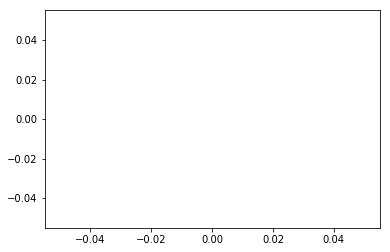

In [286]:
# new_x = []
# new_y = []
# for i in range(25):
for i in range(len(new_x)):
#     ind = random.randint(0, len(xs)-1)
#     x = xs.pop(ind)
#     y = ys.pop(ind)
    x = new_x[i]
    y = new_y[i]
    
    ans = sample(probs_2)
    a, b = ans[0][0], ans[1][0]
    a = (a - 200) / 100
    b = (b - 100) / 100

    mu = a * x + b
    sigma = 0.001
    
    y = np.random.normal(mu, sigma, 1000)
    y = y[random.randint(0,len(y)-1)]
    
#     # alternative method to sample from normal
#     y = mu + np.random.normal() * sigma
    
#     new_x.append(x)
#     new_y.append(y)

# graph after one generation

plt.figure()
plt.scatter(new_x, new_y, color="#808000")

# Redacted

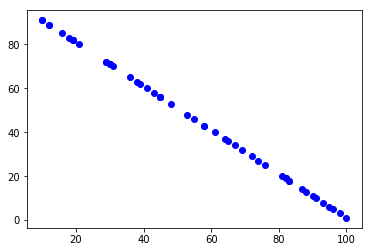

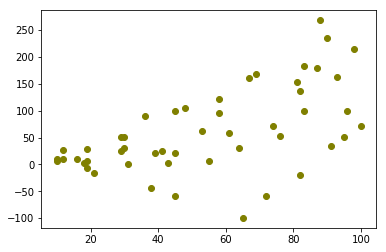

In [11]:
# Step 1 and 2: generate graph for first function
xs, ys = plot_function(1, plot=True)

# Step 3: take first 25 without replacement
bag_x = []
bag_y = []

new_x = []
new_y = []
for i in range(50):
    ind = random.randint(0, len(xs)-1)
    x = xs.pop(ind)
    y = ys.pop(ind)
    
    bag_x.append(x)
    bag_y.append(y)

    mu = a[random.randint(0,len(a)-1)] * x + b[random.randint(0,len(b)-1)]
    
    sigma = 0.001
    
    y = np.random.normal(mu, sigma, 1000)
    y = y[random.randint(0,len(y)-1)]
    
#     # alternative method to sample from normal
#     y = mu + np.random.normal() * sigma
    
    new_x.append(x)
    new_y.append(y)

# graph after one generation

plt.figure()
plt.scatter(new_x, new_y, color="#808000")

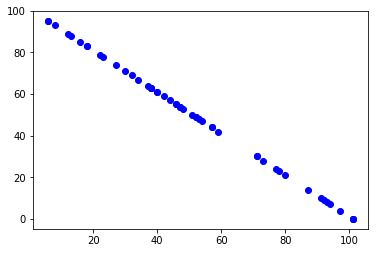

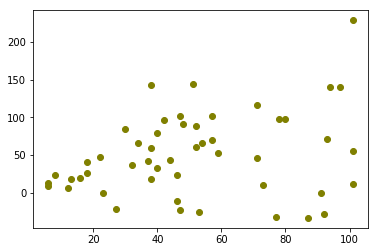

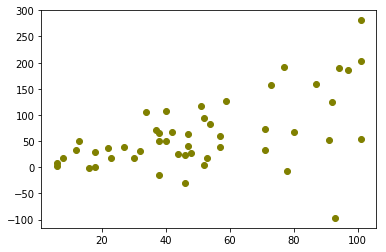

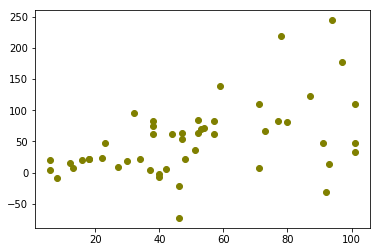

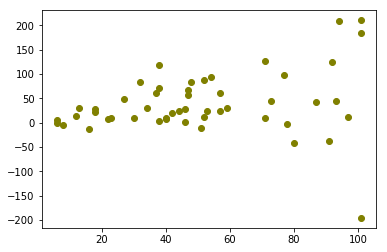

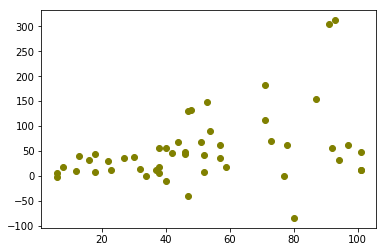

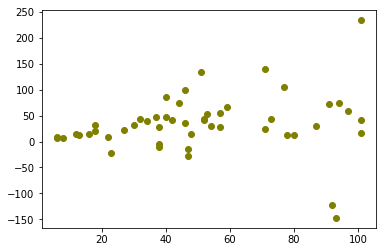

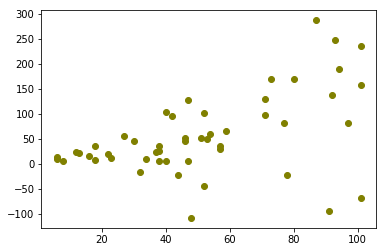

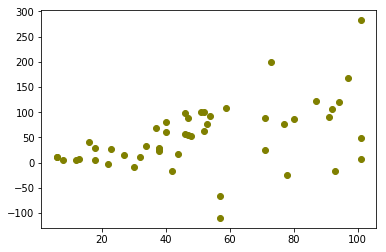

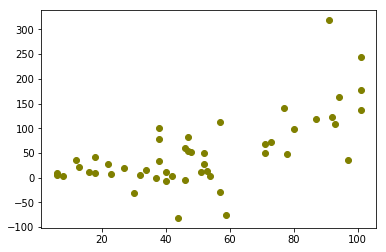

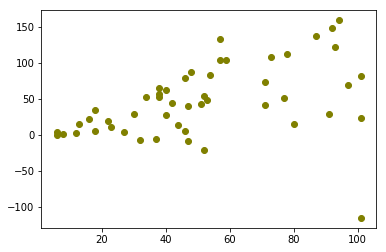

In [12]:
#### for multiple generations


# Step 1 and 2: generate graph for first function
xs, ys = plot_function(1, plot=True)

# Step 3: take first 25 without replacement
bag_x = []
bag_y = []

for i in range(10):
    
#     print(xs, ys)
    
    new_x = []
    new_y = []
    for i in range(50):
#         ind = random.randint(0, len(xs)-1)
#         x = xs.pop(ind)
#         y = ys.pop(ind)
        
        x = xs[i]
        y = ys[i]

        bag_x.append(x)
        bag_y.append(y)

        mu = a[random.randint(0,len(a)-1)] * x + b[random.randint(0,len(b)-1)]

        sigma = 0.001

        y = np.random.normal(mu, sigma, 1000)
        y = y[random.randint(0,len(y)-1)]

    #     # alternative method to sample from normal
    #     y = mu + np.random.normal() * sigma

        new_x.append(x)
        new_y.append(y)

    # graph after one generation

    plt.figure()
    plt.scatter(new_x, new_y, color="#808000")
    
    xs = new_x
    ys = new_y